<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
#import piplite
#await piplite.install(['numpy'],['pandas'])
#await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
#from js import fetch
#import io

#URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#resp = await fetch(URL)
#boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
#boston_df=pd.read_csv(boston_url)

In [5]:
#boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
#boston_df=pd.read_csv(boston_url)

In [6]:
# save to use later in case can't connect
# boston_df.to_csv("boston_housing.csv")

In [7]:
## Because saved local copy of the data
boston_df=pd.read_csv("boston_housing.csv")

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
boston_df.head()

,Unnamed: 0.1,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  506 non-null    int64  
 1   Unnamed: 0    506 non-null    int64  
 2   CRIM          506 non-null    float64
 3   ZN            506 non-null    float64
 4   INDUS         506 non-null    float64
 5   CHAS          506 non-null    float64
 6   NOX           506 non-null    float64
 7   RM            506 non-null    float64
 8   AGE           506 non-null    float64
 9   DIS           506 non-null    float64
 10  RAD           506 non-null    float64
 11  TAX           506 non-null    float64
 12  PTRATIO       506 non-null    float64
 13  LSTAT         506 non-null    float64
 14  MEDV          506 non-null    float64
dtypes: float64(13), int64(2)
memory usage: 59.4 KB


In [10]:
boston_df.describe()

,Unnamed: 0.1,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
boston_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
       'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [12]:
boston_df.shape

(506, 15)

<b>Task 2: Generate Descriptive Statistics and Visualizations</b><br>
<i>For all visualizations, please include a title in each graph and appropriate labels</i>

<u>Generate the following and explain your findings:</u>

<ol> <li> For the "Median value of owner-occupied homes" provide a boxplot</li>

 <li> Provide a  bar plot for the Charles river variable</li>

 <li> Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</li>

 <li> Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?</li>

 <li> Create a histogram for the pupil to teacher ratio variable </li></ol>



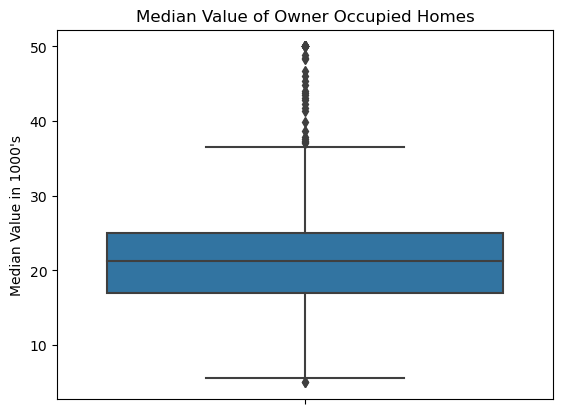

In [13]:
# Create boxplot of owner occupied homes using median value as the measure
#pyplot.figure(figsize=(10,10))

ax = sns.boxplot(y='MEDV', data=boston_df)

pyplot.title("Median Value of Owner Occupied Homes")
pyplot.ylabel("Median Value in 1000's")

#Text_String = "From the boxplot above we see that the median of all the median values in the Boston housing dataset is approximately $22,000.  \nThe interquartile range in which the middle 50% of the data resides is approximately ($17,000, $25,000).  \nNote the presence of extreme outliers above the max whisker value computed as (1.5)*IQR."
#pyplot.text(.75,50, Text_String, fontsize = 21, bbox=dict(facecolor='white', alpha=0.5))

pyplot.show()


<h3>
<u>DISCUSSION:</u>
<ul>
<li>From the boxplot above we see that the median of all the "median values" in the Boston housing dataset is approximately \$22,000.  
<li>The interquartile range in which the middle 50 percent of the data resides is approximately (\$17,000, \$25,000).
<li>Note the presence of extreme outliers above the max whisker value computed as (1.5)*IQR.  Additional analysis is required to 
determine the exact reason(s) for these outliers and to determine if/how to include them in this study.
</ul>
</h3>

In [14]:
# Not sure why the dummy variable is a float - change to an int because looks weird in the graph
boston_df['CHAS'] = boston_df['CHAS'].astype(int)
#boston_df.head()

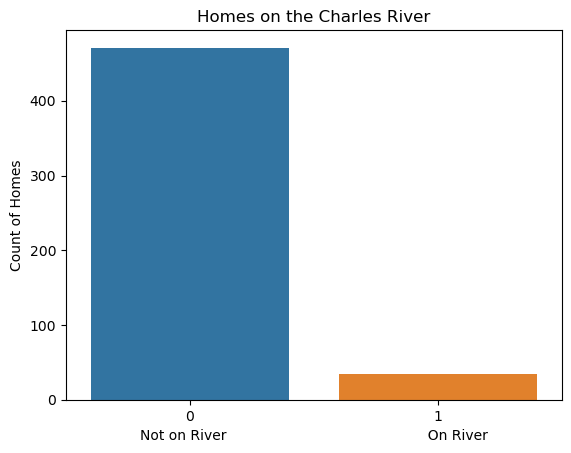

In [15]:
# Barplot for Charles River variable: 
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

ax = sns.barplot(x = 'CHAS', y = 'count', data = boston_df.groupby('CHAS').size().reset_index(name='count'))
pyplot.title("Homes on the Charles River")
pyplot.xlabel("Not on River                                              On River")
pyplot.ylabel("Count of Homes")
pyplot.show()

<h3>
<u>DISCUSSION:</u>
<ul>
<li> From the bar chart above we see that only a small number of homes (6.9%) are along the Charles River  
<li> This is to be expected as there is a limited number of waterfront real estate available.
<li> And, not surprisingly, the median home values along the waterfront are more expensive as well.
<li> The next boxplot shows the difference in median home values between waterfront and non-waterfront properties
</ul>
</h3>

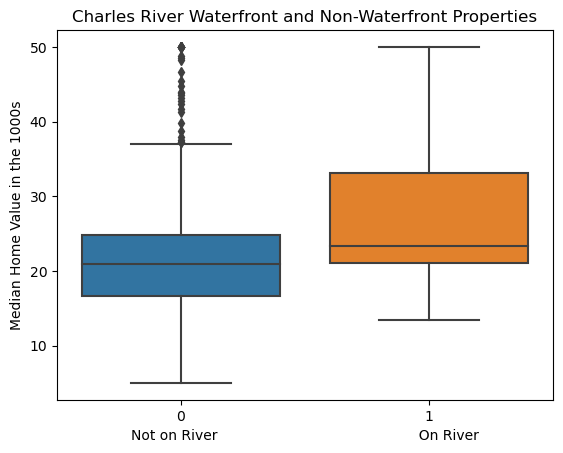

In [16]:
# Barplot for Charles River variable: 
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
ax = sns.boxplot(x='CHAS', y='MEDV', data=boston_df)
pyplot.title("Charles River Waterfront and Non-Waterfront Properties")
pyplot.xlabel("Not on River                                              On River")
pyplot.ylabel("Median Home Value in the 1000s")
pyplot.show()

<h3>
<u>DISCUSSION:</u>
<ul>
<li> From the box plot above we see that the median value of homes along the Charles River are more expensive
    than the non-water front homes.  
<li>  As previously mentioned, more analysis is needed to better understand the reasons for the large number of outliers on the non-river front properties.
</h3>

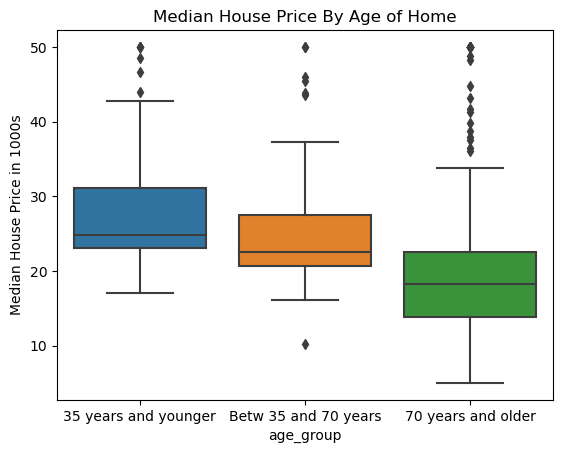

In [17]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 

# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

###################### INTERPRETATION OF THE AGE VARIABLE:
# Here AGE basically refers to the age of the buildings.
# So when you mention 0 to 35 it means there are housing communities which contain less than 35% of  
# homes which are built before 1940.  ---> So these homes are relatively new.
####################################
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Betw 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

age_order = ['35 years and younger', 'Betw 35 and 70 years', '70 years and older']
boston_df['age_group'] = pd.Categorical(boston_df['age_group'], categories=age_order, ordered=True)
boston_df.dtypes

ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.title("Median House Price By Age of Home")
pyplot.ylabel('Median House Price in 1000s')
pyplot.show()

<h3>
<u>DISCUSSION:</u>
<ul>
<li> The boxplot above shows there is a relationship between the age of a home and it's value.
<li> We see the majority of the homes follow this trend
    But, as previously mentioned, further investigation is needed to determine the reason
    for the extreme outliners, especially among the older homes.  One guess would be the older homes are historical or well 
    maintained mansions and wealthier areas of the Boston area.
</ul>
</h3>

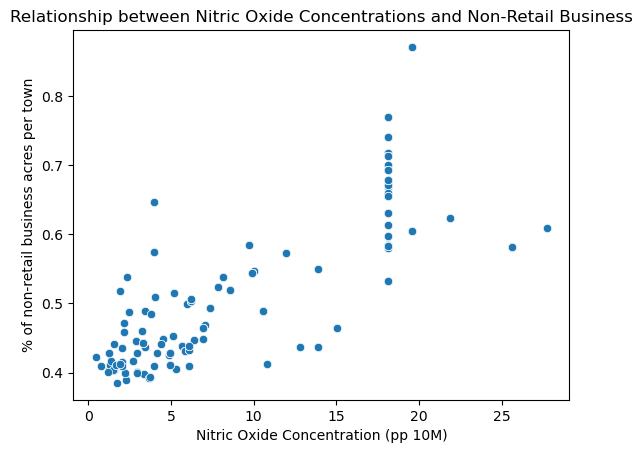

In [18]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion 
# of non-retail business acres per town. 
# NOX - nitric oxides concentration (parts per 10 million)
# INDUS - proportion of non-retail business acres per town
ax = sns.scatterplot(x='INDUS', y = 'NOX', data=boston_df)
pyplot.title("Relationship between Nitric Oxide Concentrations and Non-Retail Business")
pyplot.xlabel("Nitric Oxide Concentration (pp 10M)")
pyplot.ylabel("% of non-retail business acres per town")
pyplot.show()

<h3>
<u>DISCUSSION:</u>
<ul>
<li> The relationship between Nitric Oxide Concentrations and non-retail business areas seems to 
    have a slightly positive correlation when concentrations are less than 10 pp 10M.  
<li>  More analysis is needed to determine why there are so many data points at approximately 18 pp 10M.  
<li>  Perhaps this is a level set by regulators?
</ul>
</h3>

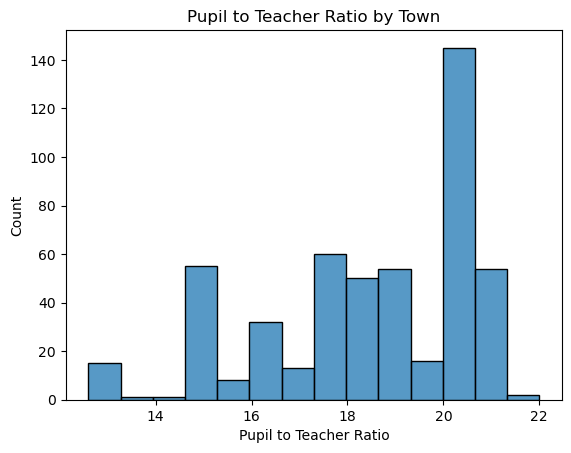

In [19]:
# Create a histogram for the pupil to teacher ratio variable
# PTRATIO - pupil-teacher ratio by town
ax = sns.histplot(x="PTRATIO", data=boston_df)
pyplot.title("Pupil to Teacher Ratio by Town")
pyplot.xlabel("Pupil to Teacher Ratio")
pyplot.ylabel("Count")
pyplot.show()


In [20]:

print("Mode: " , boston_df['PTRATIO'].mode())
print("Median: ", boston_df['PTRATIO'].median())
boston_df.agg({'PTRATIO':['mean','std', 'var', 'count']}).reset_index()

Mode:  0    20.2
Name: PTRATIO, dtype: float64
Median:  19.05


,index,PTRATIO
0,mean,18.455534
1,std,2.164946
2,var,4.686989
3,count,506.000000


<h3>
<u>DISCUSSION:</u>
<ul>
<li> The bar chart of Pupil to Teacher Ratios shows a distribution that is relatively symmetric within the interval [17,20) 
    and is skewed to the left
<li> More analysis is needed to determine why there is a jump at approximately 20 students to 1 teacher.  Perhaps this data includes university level classes.  
<li> In addition, it would be intersting to see this distribution while factoring in home value, as well as
    taking into account the grade levels of the classes (for example, lower grades typically have small student to teacher ratios)
</ul>
</h3>

<b> Task 3: Use the appropriate tests to answer the questions provided.</b>
<u>For each of the following questions;</u>

<ol><li>Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) </li>

<li>Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) </li>

<li>Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)  </li>

<li>What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)  </li> </ol>

<b>Be sure to:</b>

<ol><li>State your hypothesis.</li>

<li>Use α = 0.05</li>

<li>Perform the test Statistics.</li>

<li>State the conclusion from the test.</li></ol>

<b>QUESTION 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) </b>
<ol><li>Hypothesis:  <br><t> H0: There is no difference in the median value of the homes bounded by the Charles river
                     <br><t>HA: There is a difference. 
                     (Two-tailed test)</li>
<br>
<li>Use α = 0.05, this is a two-tailed test, thus if p is < 0.025 we will reject H0 in favor of HA.</li>
</ol>




In [21]:
## -----  Perform the test Statistic
## T-test for independent samples
#  Test for H0: equal variances among both samples - Levene
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

<b> Because the pvalue < 0.05 we reject H0 that the variances are equal, and set the equal_var parameter in the ttest_ind function below to False</b>

In [22]:
# T-test
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], 
                   alternative = 'two-sided',  ## this is the default: can also be less, greater
                      ## thus, don't have to alter alpha, as pvalue is already "doubled"
                   equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

<b> CONCLUSION: The pvalue < 0.05 so we reject H0 in favor of the alternate hypothesis that <br> there is a difference in the median value of the homes bounded by the Charles River.</b>

<b>QUESTION 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) </b>
<ol><li>Hypothesis:  <br><t> H0: There is no difference in the median value of the homes regardless of age category
                     <br><t>HA: There is a difference. 
                     </li>
<br>
<li>Use α = 0.05, thus if p is < 0.05 we will reject H0 in favor of HA.</li>
</ol>


In [23]:
# First test for equality of variance among the three samples
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'Betw 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                 #  center='median'  # pvalue is .032  - reject H0
                   center = 'mean' # pvalue is .063 - accept H0
                 #  center = 'trimmed'# pvalue is 0.048 - reject H0
                  ) 


########## notes: center parameter options#################
##'mean': Use the mean as the measure of central tendency. 
## Suitable when your data is approximately normally distributed.

####'median': This is the default option and can be a robust choice when your data contains outliers 
## or is not normally distributed. The median is less sensitive to extreme values than the mean.

######'trimmed': Use a trimmed mean as the measure of central tendency. 
## The trimmed mean involves removing a certain percentage of extreme values from both ends of the distribution before calculating the mean. This can be useful when your data has outliers that might unduly influence the variance.



LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [24]:
## ANOVA Test

ThirtyFive_less = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
Betw            = boston_df[boston_df['age_group'] == 'Betw 35 and 70 years']['MEDV']
Seventy_greater = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

scipy.stats.f_oneway(ThirtyFive_less, Betw, Seventy_greater)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

<b> CONCLUSION: The pvalue < 0.05 so we reject H0 in favor of the alternate hypothesis that <br> there is a difference in Median home value in at least one of the age categories.

<b> QUESTION 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)  </b>
<ol><li>Hypothesis:  <br><t> H0: There is no relationship
                     <br><t>HA: There is a relationship 
                     </li>
<br>
<li>Use α = 0.05, thus if p is < 0.05 we will reject H0 in favor of HA.</li>
</ol>


In [25]:
# Pearson Correlation
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

<b> CONCLUSION: The pvalue < 0.05 so we reject H0 in favor of the alternate hypothesis that <br> 
    there is a relationship between Nitric oxide concentrations and non-retail business areas.</b>

<b>QUESTION 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</b>
    
<ol><li>Hypothesis:  <br><t> H0: There is no relationship between distance to employment centers and home value.
                     <br><t>HA: There is a relationship 
                     </li>
<br>
<li>Use α = 0.05, thus if p is < 0.05 we will reject H0 in favor of HA.</li>

<li> In addition, if we find there is a relationship, then we will determine the coefficient of the weighted distance parameter to understand the impact (positive or negative, strength) it has on home value.</ol>

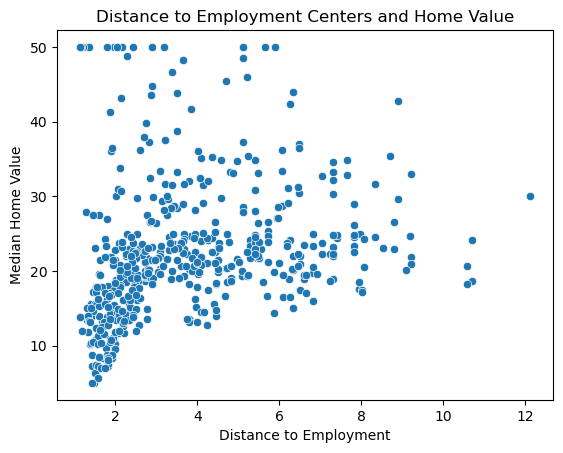

In [27]:
sns.scatterplot( x = boston_df['DIS'], y = boston_df['MEDV'])
pyplot.title("Distance to Employment Centers and Home Value")
pyplot.xlabel("Distance to Employment")
pyplot.ylabel("Median Home Value")
pyplot.show()

In [28]:
scipy.stats.pearsonr(boston_df['DIS'], boston_df['MEDV'])

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371067e-08)

In [29]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        19:14:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> CONCLUSION: The pvalue < 0.05 so we reject H0 in favor of the alternate hypothesis that <br> there is a linear relationship between home value and distance from employment centers</b>
<b> Yet, this linear relationship is small as the R-squared coefficient is close to zero 
<b> The coeffienct of the distance parameter is 1.09.  This means that for every unit increment of the distance parameter (a weighted distance, so not sure of exact measurement of 1 unit here) then there will be an increase of 1090 dollars in average median home value.

In [30]:
boston_df['DIS'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64